## Set up the environment 

In [1]:
% matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tools
import dbio

## Look at data of a single neuron 

In [18]:
# get the data from the database
suinfo, sudata = dbio.readunit(monkey = 'F16E', filenum = 994, chan = 3, 
                               stimulusid = list(range(1,24,4)), reconly = False)

# show the data
sudata[:5]

,unitid,stimulusid,repetition,timeofevents
0,912,1,1,[-1]
1,912,1,2,[-1]
2,912,1,3,[-1]
3,912,1,4,[-1]
4,912,1,5,"[-1, 1448007]"


### Visualize the raw neural responses (raster plot)

<IPython.core.display.Javascript object>


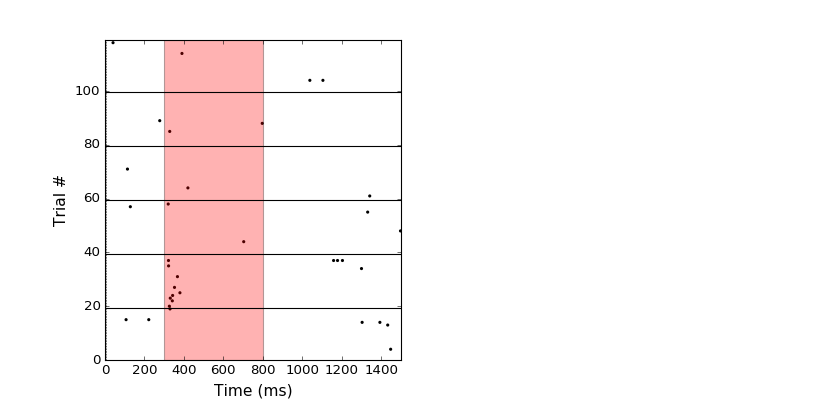

In [19]:
# plot raw neural responses
fig = plt.figure(figsize=(10.5,5))
ax=fig.add_subplot(1,2,1)
tools.rasterplot(sudata, figsize=(5, 5), s_range=(300, 800), ax=ax)

### Calculate and visualize firing rate 

In [4]:
# calcualte firing rates for the neuron
binbeg, binend = tools.genbins(t_range=[0,1500],binwid=30,stepsize=10)
surate = tools.calratetabel(sudata, binbeg, binend, dout='rate')
sumeanrate = tools.calmeanrate(surate)

In [5]:
# show the firing rate
sumeanrate[:3]

binbeg,unitid,stimulusid,0,10,20,30,40,50,60,70,...,1380,1390,1400,1410,1420,1430,1440,1450,1460,1470
binend,,,30,40,50,60,70,80,90,100,...,1410,1420,1430,1440,1450,1460,1470,1480,1490,1500
0,974,1,10.000000,10.0,10.000000,10.000000,6.666667,5.000000,3.333333,1.666667,...,1.666667,1.666667,3.333333,3.333333,8.333333,8.333333,8.333333,6.666667,6.666667,8.333333
1,974,5,6.666667,5.0,6.666667,6.666667,11.666667,11.666667,10.000000,8.333333,...,16.666667,15.000000,15.000000,13.333333,13.333333,6.666667,11.666667,11.666667,15.000000,11.666667
2,974,9,5.000000,10.0,13.333333,23.333333,23.333333,18.333333,18.333333,11.666667,...,11.666667,10.000000,8.333333,5.000000,3.333333,8.333333,11.666667,13.333333,8.333333,8.333333


In [6]:
# plot out firing rate of the neuron
axlist = []
for i in range(6): axlist.append(fig.add_subplot(6,2,2*(i+1)))
tools.plotmeanrate(sumeanrate,s_range=[300,800], ax = axlist)

## Load in data of all neurons from the database

In [7]:
# get data for the onset sustained project from the database
unitinfo, data = dbio.readsetonsust()

In [8]:
data[:5]

,unitid,stimulusid,repetition,timeofevents
0,674,1,1,"[-1, 1110640, 1275617]"
1,674,1,2,[-1]
2,674,1,3,[-1]
3,674,1,4,"[-1, 1071308]"
4,674,1,5,"[-1, 1328138]"


## Visualize population responses with PCA

### Calculate firing rates and perform PCA
Calculate firing rates during sound presentation in time bins of 30 ms width, with 5 ms displacement between neighboring bins. Then perform PCA on the firing rate data. 

In [9]:
# define time bins for calculating firing rates
binbeg, binend = tools.genbins(t_range=[300,800],binwid=30,stepsize=10)

# calculate firing rates
spkrate = tools.calratetabel(data, binbeg, binend)

In [10]:
# see firing rate results
spkrate[:5]

binbeg                        300  310  320  330  340  350  360  370  380  \
binend                        330  340  350  360  370  380  390  400  410   
unitid stimulusid repetition                                                
674    1          1           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
                  2           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
                  3           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
                  4           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
                  5           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

binbeg                        390 ...   680  690  700  710  720  730  740  \
binend                        420 ...   710  720  730  740  750  760  770   
unitid stimulusid repetition      ...                                       
674    1          1           0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
                  2           0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
                  3           0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
                  4           0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
                  5           0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   

binbeg                        750  760  770  
binend                        780  790  800  
unitid stimulusid repetition                 
674    1          1           0.0  0.0  0.0  
                  2           0.0  0.0  0.0  
                  3           0.0  0.0  0.0  
                  4           0.0  0.0  0.0  
                  5           0.0  0.0  0.0  

[5 rows x 48 columns]

In [11]:
# PCA
spkratepc = tools.neutraj(spkrate, npc = 3)

In [12]:
# see PCA results
spkratepc[:5]

PC#                     0                                                 \
stimulusid             1           5           9           13         17   
binbeg binend                                                              
300    330      52.964232   63.641012   89.538508   51.237007  -8.635197   
310    340     132.716050  203.577662  229.153038  133.134133  29.861815   
320    350     194.686957  300.925964  302.591495  190.496035  74.294491   
330    360     201.316492  281.223506  270.719960  171.622683  75.910921   
340    370     178.128030  210.533488  195.598317  110.361373  61.124764   

PC#                                1                                    \
stimulusid            21          1          5          9           13   
binbeg binend                                                            
300    330    -27.344630  -17.858065 -35.987534 -64.194756  -72.860335   
310    340     -7.542399   14.507297 -20.133624 -67.111872 -104.084504   
320    350     23.092173   47.941357   8.140136 -39.955894 -102.381178   
330    360     37.897175   95.690116  55.647484   4.879501  -59.614682   
340    370     39.178816  107.310868  71.546485  24.560708  -35.845795   

PC#                                           2                         \
stimulusid             17         21         1          5           9    
binbeg binend                                                            
300    330     -64.955745 -37.228701 -37.829289 -20.600730  -14.998358   
310    340     -91.506027 -62.934717 -61.557446 -23.219934   17.954379   
320    350    -115.117258 -83.761970 -76.315418  -8.245146   51.121163   
330    360    -111.191685 -78.937061 -61.034487  -0.463814   90.860826   
340    370    -102.342392 -62.455486 -41.919003  10.161327  100.844852   

PC#                                             
stimulusid            13         17         21  
binbeg binend                                   
300    330     -6.954525 -37.580495 -29.504391  
310    340     16.660893 -57.300288 -32.780316  
320    350     37.678393 -64.518673 -39.011108  
330    360     73.776626 -67.813663 -34.822367  
340    370     62.755818 -50.946023 -28.479700

### Plot the first 3 principal components

<IPython.core.display.Javascript object>


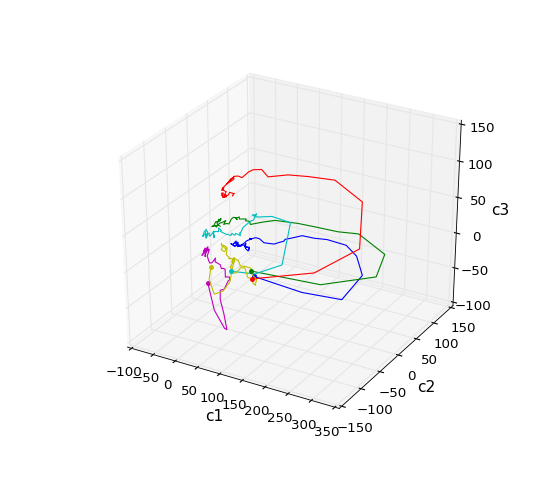

In [13]:
tools.plotneutraj(spkratepc, figsize=(7,6))

### Predicting sound label from neural responses

In [14]:
# define time bins for calculating firing rates
binbeg, binend = tools.genbins(t_range=[0,1500],binwid=15,stepsize=5)

# calculate firing rates
spkratedec = tools.calratetabel(data, binbeg, binend)

In [15]:
# predicting sound label from neural responses
accuracy = tools.neuraldecode(spkratedec, testsize = 6, numevals = 20)

<IPython.core.display.Javascript object>


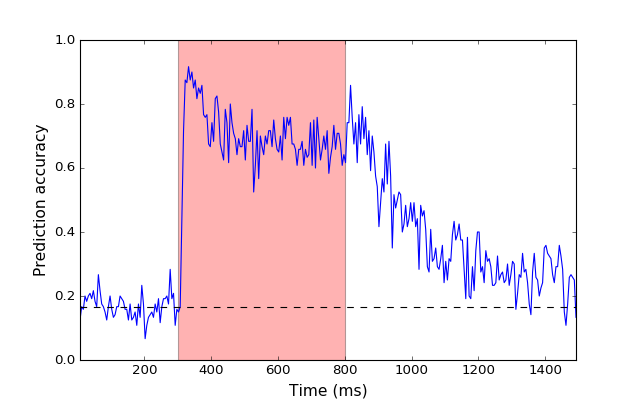

In [16]:
# plot prediction accuracy
tools.plotaccuracy(accuracy, figsize=(8, 5), s_range=[300,800], chance_level = 1/6)